#  Product Analysis

This analysis focuses on identifying the most popular products based on quantity sold. Understanding product popularity helps optimize inventory management, marketing efforts, and sales strategies.



## What We Will Explore:

### 1. Product Popularity Metrics
- **Total Quantity Sold**: Sum of all units sold per product.
- **Top-Selling Products**: Products with the highest sales volume.



### 2. Import Cleaned Data from ETL Pipeline

We use the cleaned dataset (`df_cleaned`) that was prepared in the ETL pipeline. The following steps were already applied:
- Removed rows with missing `CustomerID` or `Description`.
- Removed cancelled orders (Invoices starting with 'C').
- Excluded records with negative or zero `Quantity` or `UnitPrice`.
- Converted `InvoiceDate` to datetime format.
- Created new columns: `TotalPrice`, `Year`, `Month`, `Day`, `Hour`, `Weekday`.
- Renamed `Description` to `ProductName`.
- Cleaned `ProductName` by stripping whitespace and converting to lowercase.
- Removed duplicate records.

These preprocessing steps ensure we analyze clean, accurate, and consistent data.




## 3. Visualizations

To effectively understand product trends and identify bestsellers, we will use:

- **Seaborn**: A horizontal bar chart that displays the top 10 products ranked by the total quantity sold, using color to enhance readability and clarity.



## Importing Libraries

Before we begin our product analysis, we need to import the essential Python libraries that will help us load, process, and visualize the data.

### Libraries Used:

- **pandas**: For data manipulation and analysis (e.g., grouping products, aggregating sales).
- **numpy**: For numerical operations and handling arrays.
- **matplotlib.pyplot**: A core Python library for creating static visualizations like bar charts.
- **seaborn**: A higher-level visualization library built on top of matplotlib, useful for creating aesthetically pleasing charts such as horizontal bar plots.

### Display Settings:

- `%matplotlib inline`: Ensures that Matplotlib charts appear directly within the notebook cells.
- `plt.style.use('ggplot')`: Applies a clean and visually appealing style to Matplotlib plots.
- `sns.set(style='whitegrid')`: Sets the background style of Seaborn plots to show light gridlines for better readability.

These libraries will provide the necessary tools for data aggregation, cleaning, and visual storytelling throughout this product analysis.


In [21]:
# Importing Libraries for Product Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for plots
%matplotlib inline
plt.style.use('ggplot')
sns.set(style='whitegrid')


In [45]:
# Step 1: Load cleaned data 
df = pd.read_csv('../data/cleaned/cleaned_online_retail.csv')
df.head



/var/folders/2b/6mjnm51s11l2r_38ms04m1jc0000gn/T/ipykernel_22978/1228718833.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cleaned/cleaned_online_retail.csv')


<bound method NDFrame.head of        InvoiceNo StockCode                          ProductName  Quantity  \
0         536365    85123A   white hanging heart t-light holder         6   
1         536365     71053                  white metal lantern         6   
2         536365    84406B       cream cupid hearts coat hanger         8   
3         536365    84029G  knitted union flag hot water bottle         6   
4         536365    84029E       red woolly hottie white heart.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          pack of 20 spaceboy napkins        12   
524874    581587     22899          children's apron dolly girl         6   
524875    581587     23254         childrens cutlery dolly girl         4   
524876    581587     23255      childrens cutlery circus parade         4   
524877    581587     22138         baking set 9 piece retrospot         3   

                InvoiceDate  UnitPrice  Custo

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   ProductName  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   524878 non-null  int64  
 7   Country      524878 non-null  object 
 8   TotalPrice   524878 non-null  float64
 9   Year         524878 non-null  int64  
 10  Month        524878 non-null  int64  
 11  Day          524878 non-null  int64  
 12  Hour         524878 non-null  int64  
 13  Weekday      524878 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 56.1+ MB


In [25]:
# Convert 'InvoiceDate' from string/object to datetime format
# This enables date operations like sorting and filtering
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert 'Invoice' from object to numeric type
# errors='coerce' turns invalid values into NaN instead of error
# .astype('Int64') ensures integer type that supports missing values (NaN)
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce').astype('Int64')


In [27]:
#to validate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524877 non-null  Int64         
 1   StockCode    524878 non-null  object        
 2   ProductName  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  int64         
 7   Country      524878 non-null  object        
 8   TotalPrice   524878 non-null  float64       
 9   Year         524878 non-null  int64         
 10  Month        524878 non-null  int64         
 11  Day          524878 non-null  int64         
 12  Hour         524878 non-null  int64         
 13  Weekday      524878 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 56.6+ 

### Data Type Review and Planned Changes

- **StockCode**  
  Contains a mix of numbers and letters (e.g., `85123A`), as confirmed by the Kaggle dataset description.  
  This column will be left as is (`object` type) since it naturally holds alphanumeric codes.

- **ProductName**  
  Contains special characters, numbers, and strings, as per Kaggle.  
  This column will also remain as `object` because of its mixed content.

- **Country**  
  Confirmed to be a string column representing country names.  
  Will be explicitly converted to string type (`str`) for consistency.

- **Weekday**  
  Created from the `InvoiceDate` column and contains day names as strings.  
  Will be explicitly converted to string type (`str`) to ensure consistent formatting.

---

### Summary of Planned Changes

| Column     | Current Type | Action             |
|------------|--------------|--------------------|
| StockCode  | object       | Leave as it is     |
| ProductName| object       | Leave as it is     |
| Country    | object       | Convert to string  |
| Weekday    | object       | Convert to string  |


In [42]:
# Convert 'Country' column to string type for consistency
df['Country'] = df['Country'].astype(str)



In [44]:
df.columns

Index(['InvoiceNo', 'StockCode', 'ProductName', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Year', 'Month',
       'Day', 'Hour', 'Weekday'],
      dtype='object')

In [43]:
#to validate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524877 non-null  Int64         
 1   StockCode    524878 non-null  object        
 2   ProductName  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  int64         
 7   Country      524878 non-null  object        
 8   TotalPrice   524878 non-null  float64       
 9   Year         524878 non-null  int64         
 10  Month        524878 non-null  int64         
 11  Day          524878 non-null  int64         
 12  Hour         524878 non-null  int64         
 13  Weekday      524878 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 56.6+ 

### Next Step: Identify Popular Products

To analyze popular products in the dataset, the following approach is recommended:

1. **Aggregate sales data by product:**  
   Group the data by `ProductName`to summarize sales figures.

2. **Calculate total sales or quantity:**  
   Compute the total quantity sold or total revenue generated per product.  
   For revenue, multiply `Quantity` by `UnitPrice`.

3. **Sort products by popularity:**  
   Sort the products in descending order based on total quantity or total revenue to find the top performers.

In [46]:
# Calculate total quantity sold per product
popular_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Calculate total revenue per product
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
popular_products_revenue = df.groupby('ProductName')['TotalPrice'].sum().sort_values(ascending=False).head(10)

print(popular_products)
print(popular_products_revenue)

ProductName
paper craft , little birdie           80995
medium ceramic top storage jar        78033
world war 2 gliders asstd designs     54951
jumbo bag red retrospot               48371
white hanging heart t-light holder    37872
popcorn holder                        36749
pack of 72 retrospot cake cases       36396
assorted colour bird ornament         36362
rabbit night light                    30739
mini paint set vintage                26633
Name: Quantity, dtype: int64
ProductName
dotcom postage                        206248.77
regency cakestand 3 tier              174156.54
paper craft , little birdie           168469.60
white hanging heart t-light holder    106236.72
party bunting                          99445.23
jumbo bag red retrospot                94159.81
medium ceramic top storage jar         81700.92
postage                                78101.88
manual                                 77752.82
rabbit night light                     66870.03
Name: TotalPrice, dtype: fl


# Visualization

### Visualizing Top 10 Popular Products by Quantity Sold using Seaborn

To better understand which products are most popular, we aggregate the total quantity sold per product, then visualize the top 10 products using a bar chart with Seaborn.




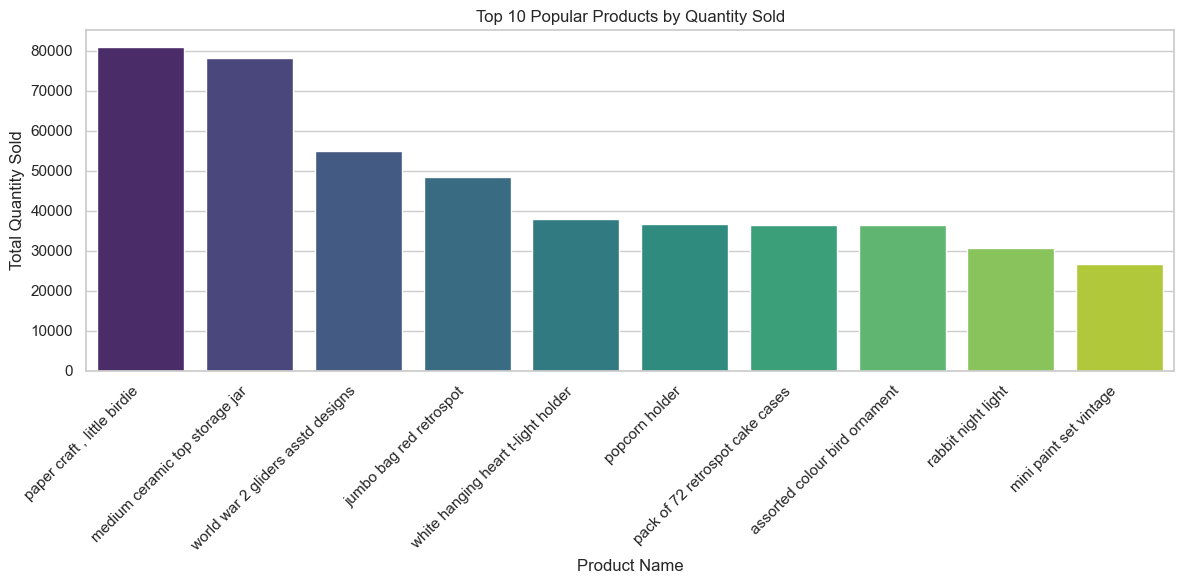

In [49]:

# Prepare data: top 10 products by quantity sold
popular_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()


plt.figure(figsize=(12,6))
sns.barplot(x='ProductName', y='Quantity', data=popular_products, hue='ProductName', palette='viridis', legend=False)
plt.title('Top 10 Popular Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
